<a href="https://colab.research.google.com/github/Rahman88talha/Credit_Card_Default_Prediction_Classification/blob/main/Credit_Card_default_Prediction(Classification)_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

## EDA

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# call data from drive
df1 = pd.read_csv('/content/drive/MyDrive/Capstone-Classification-Credit-Card_Default/default-of-credit-card -lients.csv')

In [4]:
df1.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [5]:
df1.shape

(30001, 25)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30001 non-null  object
 1   X1          30001 non-null  object
 2   X2          30001 non-null  object
 3   X3          30001 non-null  object
 4   X4          30001 non-null  object
 5   X5          30001 non-null  object
 6   X6          30001 non-null  object
 7   X7          30001 non-null  object
 8   X8          30001 non-null  object
 9   X9          30001 non-null  object
 10  X10         30001 non-null  object
 11  X11         30001 non-null  object
 12  X12         30001 non-null  object
 13  X13         30001 non-null  object
 14  X14         30001 non-null  object
 15  X15         30001 non-null  object
 16  X16         30001 non-null  object
 17  X17         30001 non-null  object
 18  X18         30001 non-null  object
 19  X19         30001 non-null  object
 20  X20   

*No Null Values in this Dataset*

### Changing th name of Column for own Convenience

In [7]:
# Creating variable with the help of index 0
column_names = list(df1.iloc[0].values)
# droping first row 
df1.drop(index = df1.index[0],axis = 0, inplace = True)
# Reset the columns
df1 = df1.set_axis(column_names,axis = 1)
# Changing the data-types of each features
df1 = df1.astype('int')
df1.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [8]:
df1.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

Describing the columns

ID: ID of each customer

LIMIT_BAL: Amount of the given credit (NT dollar)

SEX: Gender(Male = 1, Female: 2)

EDUCATION: (1= graduate school, 2=University, 3=High School, 0,4,5,6 = Others)

MARRIAGE: Marital status (0 = others, 1 = married, 2 = single, 3 = others)

AGE: Age in years

Scale for PAY_0 to PAY_6 : (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only),

1 = payment delay for one month, 

2 = payment delay for two months, ........., 8 = payment delay for eight months,
 
9 = payment delay for nine months and above)

PAY_0: Repayment status in September, 2005 (same scale as given)

PAY_2: Repayment status in August, 2005 (same scale as given)

PAY_3: Repayment status in July, 2005 (same scale as given)

PAY_4: Repayment status in June, 2005 (same scale as given)

PAY_5: Repayment status in May, 2005 (same scale as given)

PAY_6: Repayment status in April, 2005 (same scale as given)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default payment next month: Default Payments(1 = Yes, 0 = No)


In [9]:
# Identifying the unique number of values in the dataset
df1.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

In [10]:
# Creating Copy of DataFrame
df2 = df1.copy()

In [11]:
df2.rename(columns = {'default payment next month':'Next_month_defaulter','PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN',
                     
                   'PAY_5':'PAY_MAY','PAY_6':'PAY_APR','BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL',

                   'BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR','PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG',
                   
                   'PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'} ,inplace=True )

Renaming the Column for our Better Understanding

In [12]:
df2.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Next_month_defaulter
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [13]:
# Total counts of customers default payment
df2['Next_month_defaulter'].value_counts()

0    23364
1     6636
Name: Next_month_defaulter, dtype: int64

This will be our Dependent variable for Analysis

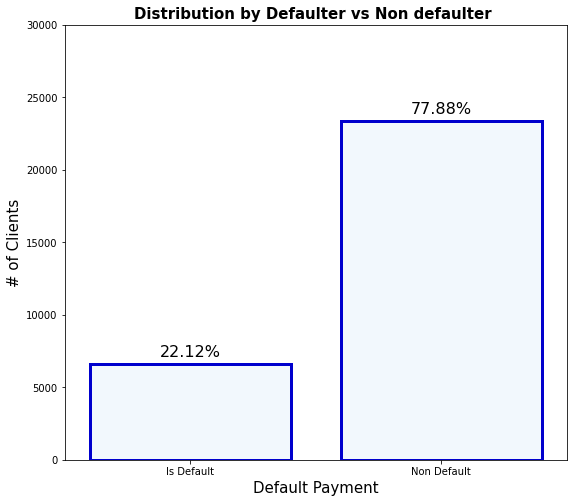

In [14]:
# Replacing the values of 0 and 1 to string values for better understanding.
df2['Defaulter'] = df2.Next_month_defaulter.replace([1,0], ['Is Default', 'Non Default'])

#plotting the count plot to vizualize the data distribution 
plt.figure(figsize=(9,8))
ax = sns.countplot(x="Defaulter", data=df2,color = 'aliceblue', edgecolor = 'mediumblue',lw =3)
plt.xlabel("Default Payment", fontsize= 15)
plt.ylabel("# of Clients", fontsize= 15)
plt.ylim(0,30000)        # making the y-axis limit to 30,000
plt.title('Distribution by Defaulter vs Non defaulter ',weight ='bold', fontsize= 15)
for p in ax.patches:                               # This step is used for showing the percentage on the graph
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/df2.shape[0]*100),ha = "center", fontsize= 16)

Defaulters are less than the Non Defaulters

## Independent Var

**Sex** - Categorical Feature

1 = Male

2 = Female

In [15]:
df2['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

**Education** - Categorical

1=Graduate school, 

2=University, 

3=High school, 

4=Others, 

5=unknown, 

6=unknown

In [16]:
df2['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

Since, 5, 6 & 0 is not defined, then we can add them all in Others which is 4

In [17]:
colm = (df2['EDUCATION'] == 5) | (df2['EDUCATION'] == 6) | (df2['EDUCATION'] == 0)
df2.loc[colm, 'EDUCATION'] = 4
df2['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

**MARRIAGE** - Categorical

1=Married, 2=Single, 3=Others

In [18]:
df2['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

0 isn't explained so we put this 0 to others i.e, 3.

In [19]:
colm = df2['MARRIAGE'] == 0
df2.loc[colm, 'MARRIAGE'] = 3
df2['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [20]:
cat_features = ['SEX', 'EDUCATION', 'MARRIAGE']
df_category = df2[cat_features]
df_category = pd.concat([df_category, df2['Defaulter']], axis=1)

# lets replace the values of categorical column by names as given in the data above
df_category.replace({'SEX':{1:'Male', 2:'Female'} , 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'},
               'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

In [21]:
df_category.head(10)

,SEX,EDUCATION,MARRIAGE,Defaulter
1,Female,university,married,Is Default
2,Female,university,single,Is Default
3,Female,university,single,Non Default
4,Female,university,married,Non Default
5,Male,university,married,Non Default
6,Male,graduate school,single,Non Default
7,Male,graduate school,single,Non Default
8,Female,university,single,Non Default
9,Female,high school,married,Non Default
10,Male,high school,single,Non Default


Lets Visualize Categorical Features

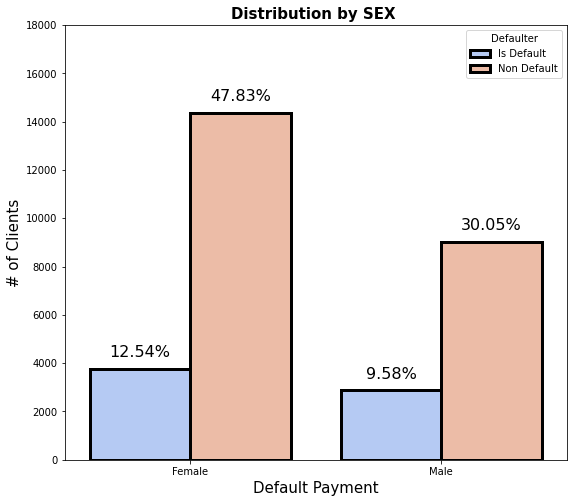

In [22]:
# plotting graph for SEX [Is Defaulter or not]
plt.figure(figsize=(9,8))
ax = sns.countplot(x="SEX", data=df_category,  palette = 'coolwarm', hue="Defaulter" ,edgecolor = 'black',lw =3)
plt.xlabel("Default Payment", fontsize= 15)
plt.ylabel("# of Clients", fontsize= 15)
plt.ylim(0,18000)
plt.title('Distribution by SEX ',weight ='bold', fontsize= 15)
for p in ax.patches:                               
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/df2.shape[0]*100),ha = "center", fontsize= 16)

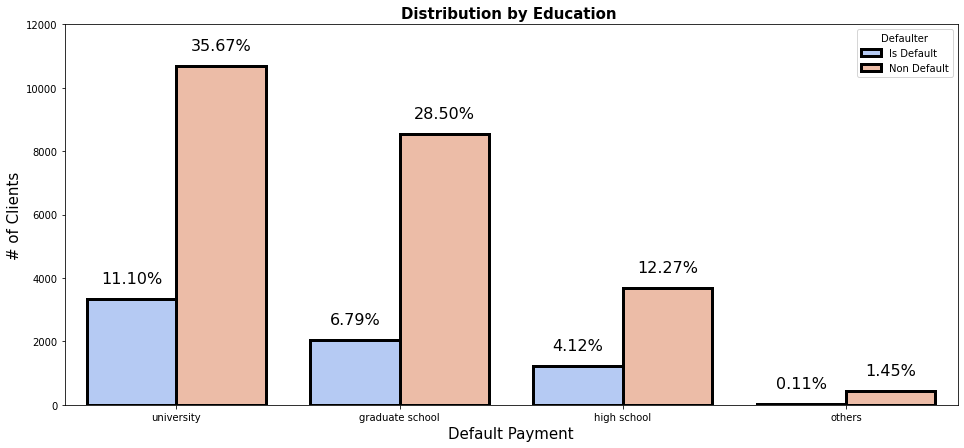

In [23]:
# plotting graph for Education [university, graduate school, highschool, others]
plt.figure(figsize=(16,7))
ax = sns.countplot(x="EDUCATION", data=df_category,  palette = 'coolwarm', hue="Defaulter" ,edgecolor = 'black',lw =3)
plt.xlabel("Default Payment", fontsize= 15)
plt.ylabel("# of Clients", fontsize= 15)
plt.ylim(0,12000)
plt.title('Distribution by Education ',weight ='bold', fontsize= 15)
for p in ax.patches:                               
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/df2.shape[0]*100),ha = "center", fontsize= 16)

University 11% are default, from Graduate 7% are default, and from High School 4% are default.

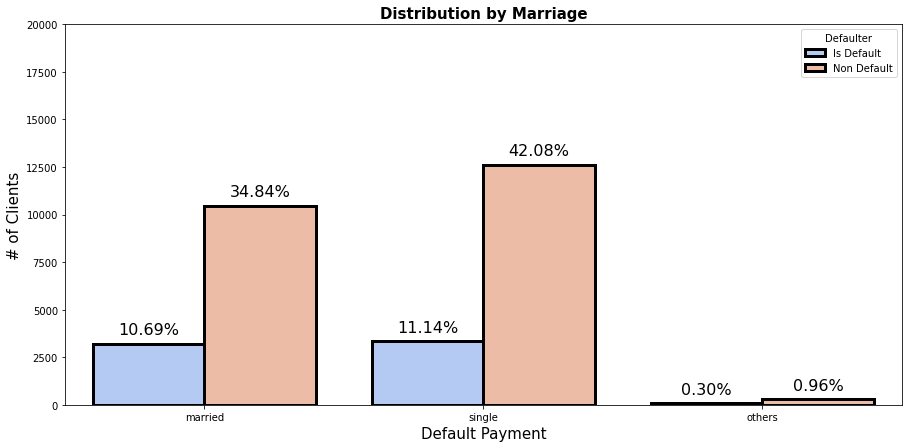

In [24]:
# plotting graph for Marriage [married, single, others]
plt.figure(figsize=(15,7))
ax = sns.countplot(x="MARRIAGE", data=df_category,  palette = 'coolwarm', hue="Defaulter" ,edgecolor = 'black',lw =3)
plt.xlabel("Default Payment", fontsize= 15)
plt.ylabel("# of Clients", fontsize= 15)
plt.ylim(0,20000)
plt.title('Distribution by Marriage',weight ='bold', fontsize= 15)
for p in ax.patches:                               
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/df2.shape[0]*100),ha = "center", fontsize= 16)

## AGE

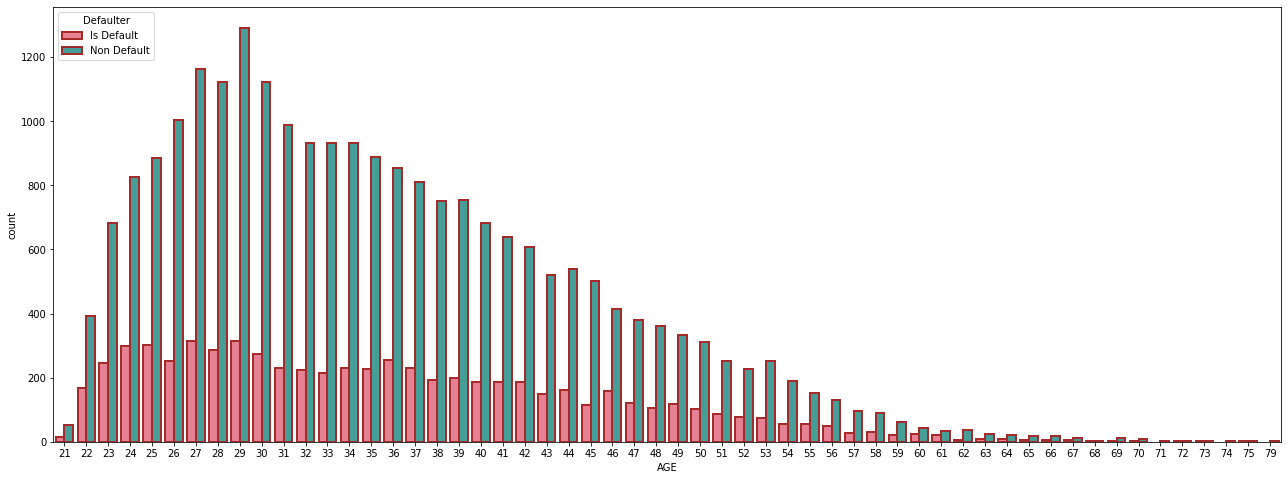

In [25]:
plt.figure(figsize=[22, 8])
sns.countplot(x = 'AGE', hue = 'Defaulter', data =df2, palette = 'husl', edgecolor = 'brown',lw=2)

Number of Defaulters between age of 27-30 is Highest

## LIMIT BALANCE

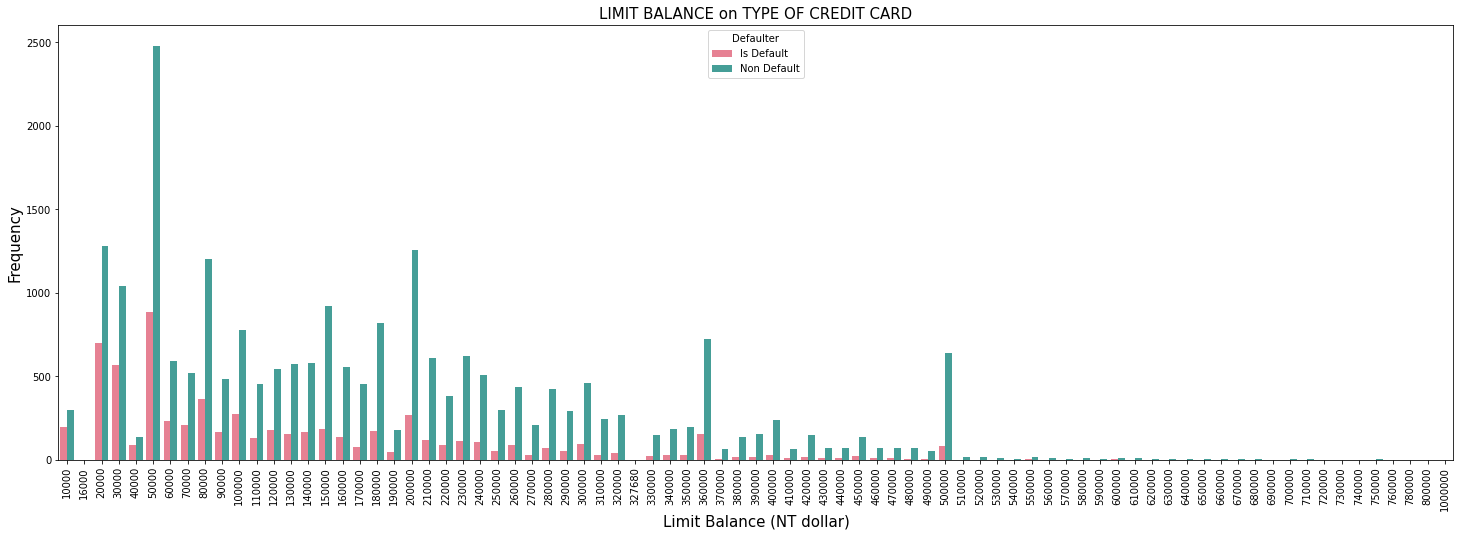

In [26]:
#plotting the count plot to vizualize the data distribution with respect to Limit Balance
plt.figure(figsize=[25, 8])
sns.countplot(x = 'LIMIT_BAL', hue = 'Defaulter',data =df2, palette = 'husl')
plt.xticks(rotation = 90)
plt.xlabel('Limit Balance (NT dollar)', SIZE=15)
plt.ylabel('Frequency', SIZE=15)
plt.title('LIMIT BALANCE on TYPE OF CREDIT CARD', SIZE=15)
plt.show()

Maximum amount of given credit in NT dollars is 50,000 followed by 20,000 and 30,000.

Defaulters are between 20,000 - 60,000 Limit Balance only.

## PAYMENT STATUS

Describing the Xlabel of Repay scale
-2 = No consumption

-1 = paid in full

0 = use of revolving credit (paid minimum only)

1 = payment delay for one month

2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

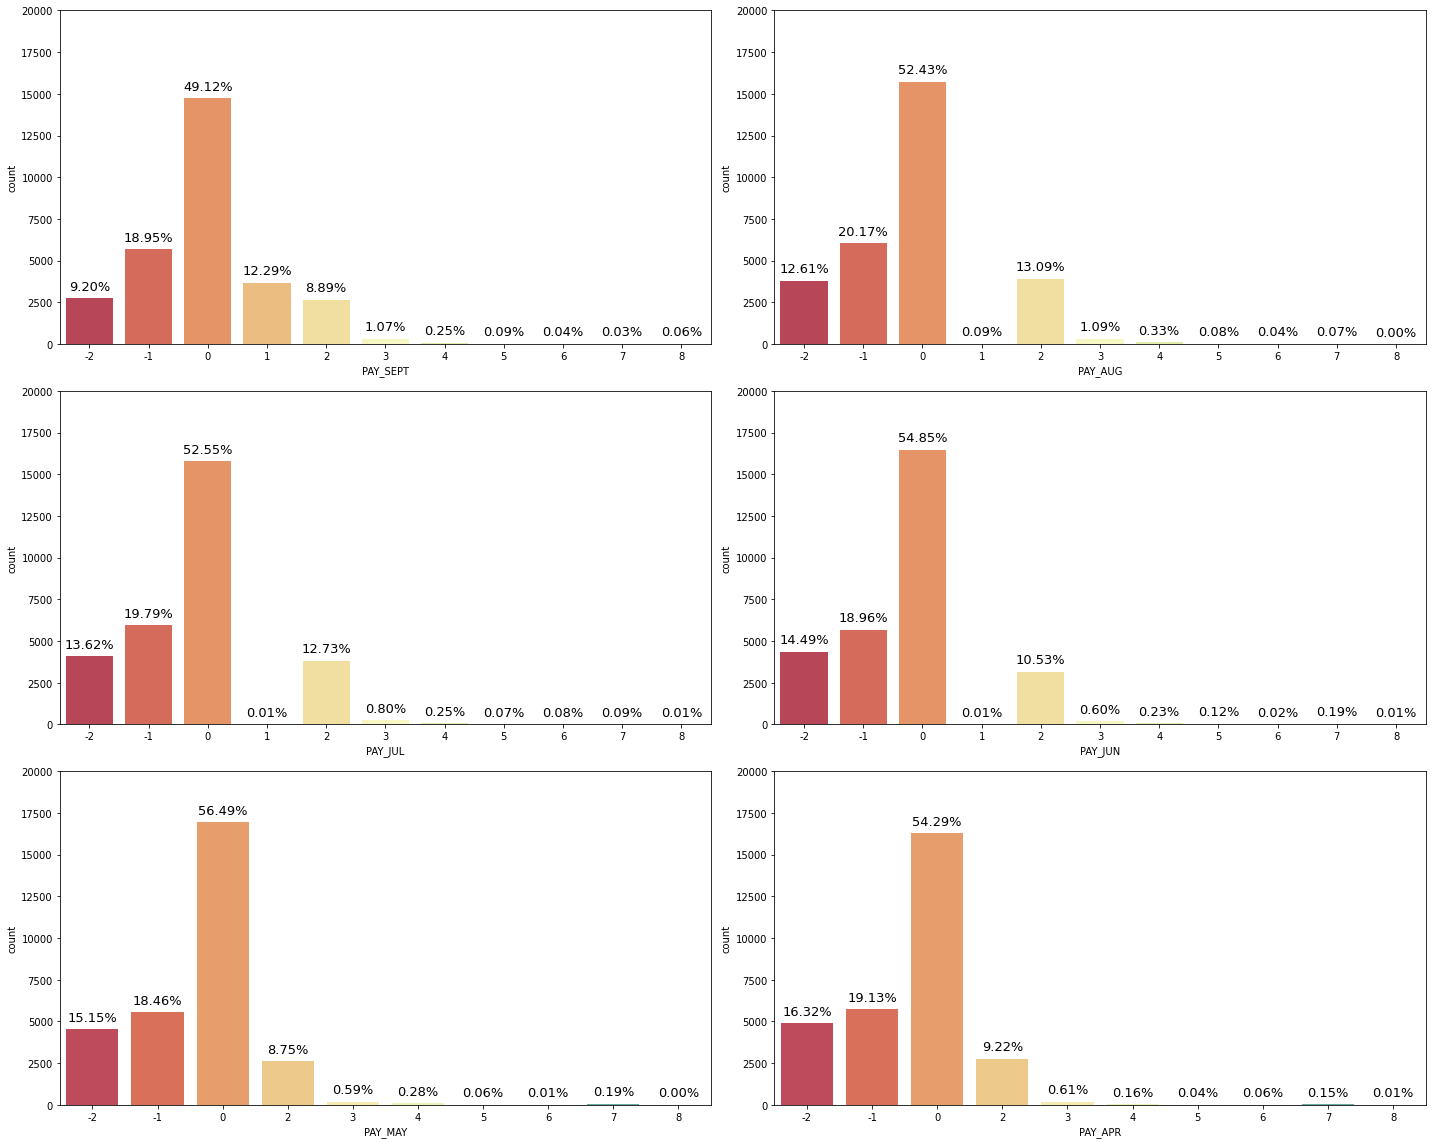

In [27]:
# looking at the payment columns for each month.
pay = ['PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR']

# Plotting graph for payment columns 
plt.figure(figsize=(20,16))
for i,col in enumerate(pay):    
    plt.subplot(3,2,i + 1)
    ax = sns.countplot(df2.loc[:,col], palette = 'Spectral')
    plt.ylim(0,20000)
    plt.ylabel('count')
    plt.tight_layout()

    for p in ax.patches:                               
      height = p.get_height()
      ax.text(p.get_x()+p.get_width()/2, height+500, '{:1.2f}''%'.format(height/df2.shape[0]*100),ha = "center", fontsize= 13)

### Checking Outlier

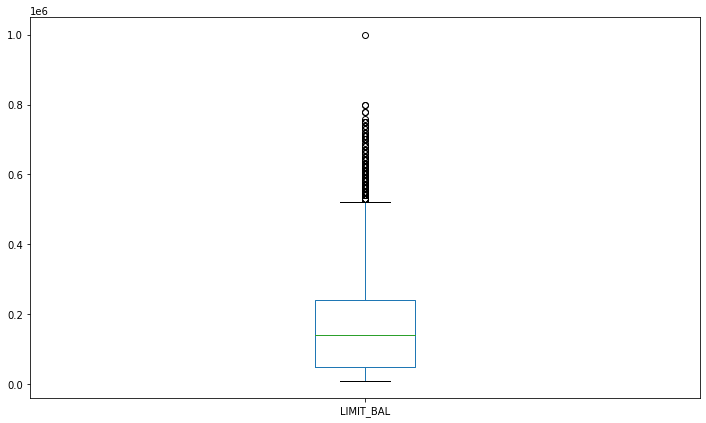

In [28]:
#Using boxplot to identify the outlier in the dataset
plt.figure(figsize=(12,7))
df2["LIMIT_BAL"].plot(kind="box")
plt.show()

Outliers Removing

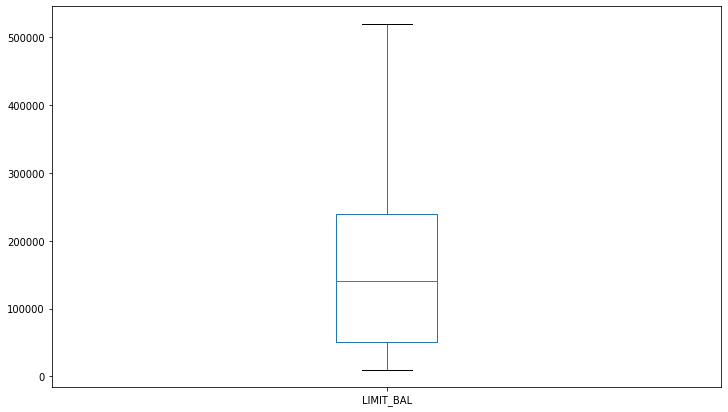

In [29]:
def remove_outlier_using_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final_output = df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final_output
df2["LIMIT_BAL"] = remove_outlier_using_IQR(df2["LIMIT_BAL"])


#After removing outlier
plt.figure(figsize=(12,7))
df2["LIMIT_BAL"].plot(kind="box")
plt.show()

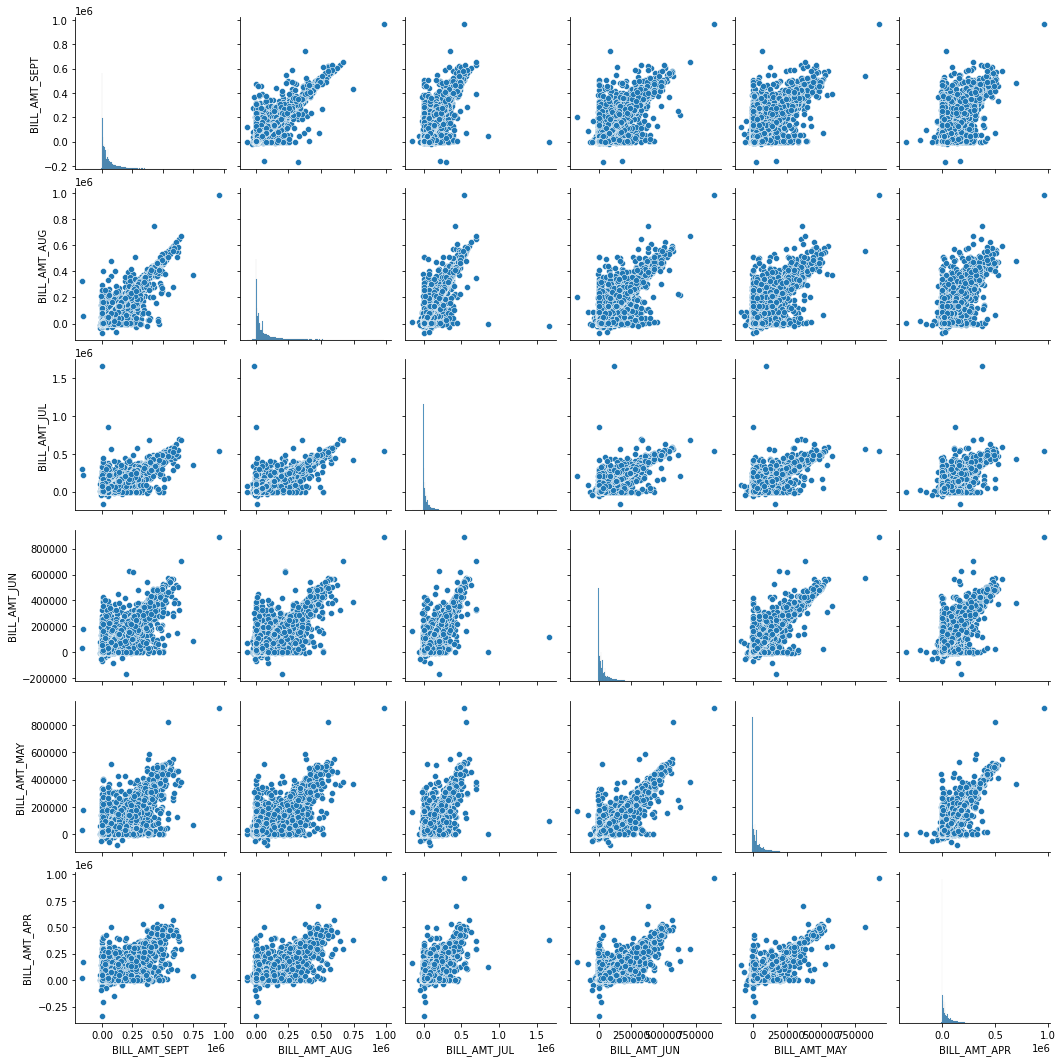

In [30]:
#assign the bill amount features to a single variable 
df_bill_amount = df2[['BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR']]
sns.pairplot(data = df_bill_amount) #plotting the pair plot for bill amount

 ## ONE-HOT ENCODING


One-hot encoding is a technique which is used to convert or transform a categorical feature having string labels into K numerical features in such a manner that the value of one out of K (one-of-K) features is 1 and the value of rest (K-1) features is 0. It is also called as dummy encoding as the features created as part of these techniques are dummy features which don’t represent any real world features. Rather they are created for encoding the different values of categorical feature using dummy numerical features. The primary need for using one-hot encoding technique is to transform or convert the categorical features into numerical features such that machine learning libraries can use the values to train the model.

One-Hot Encoding on 'EDUCATION', 'MARRIAGE', and 'SEX' because there are some negatively correlated feature like age and marriage.

In [31]:
#get dummies variable

df2 = pd.get_dummies(df2,columns=['EDUCATION','SEX','MARRIAGE'])


# removing some columns that are unimportant.

df2.drop(['ID','Defaulter','AGE'], axis=1,inplace =True)
df2 = df2.dropna()
df2=df2.astype('int64')
df2.shape

(29833, 29)

In [32]:
df2.head()

,LIMIT_BAL,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Next_month_defaulter,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,SEX_1,SEX_2,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
1,20000,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,1,0,0,0,1,1,0,0
2,120000,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,1,0,0,0,1,0,1,0
3,90000,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,1,0,0,0,1,0,1,0
4,50000,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,1,0,0,0,1,1,0,0
5,50000,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0,1,0,0,1,0,1,0,0


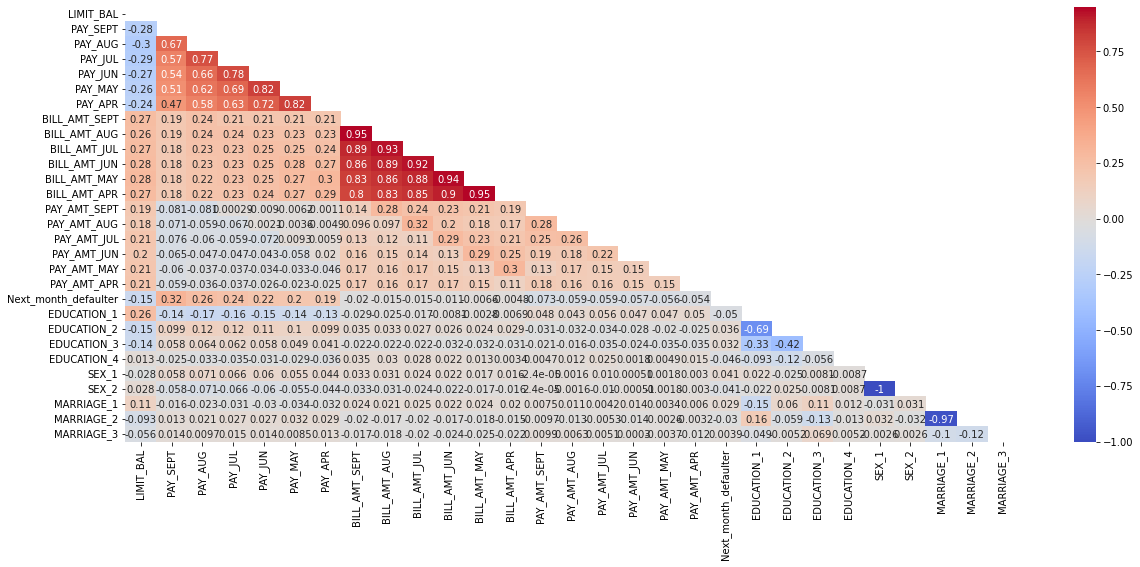

In [33]:
# Heatmap plot for correlation between different variable
plt.figure(figsize=(20,8))
correlation = df2.corr()
mask = np.triu(np.ones_like(df2.corr()))
sns.heatmap((correlation),mask=mask,annot=True,cmap='coolwarm')

DIVIDING DATASETS INTO INDEPENDENT AND DEPENDENT VARIABLES

In [34]:
X = df2.drop(['Next_month_defaulter'] , axis=1)
y = df2['Next_month_defaulter']

X = X.apply(lambda x : (x-np.mean(x))/np.std(x))
X.head()

,LIMIT_BAL,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,SEX_1,SEX_2,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
1,-1.154838,1.792316,1.779811,-0.697360,-0.667088,-1.529521,-1.485913,-0.650323,-0.655496,-0.676010,-0.682713,-0.674268,-0.662249,-0.342148,-0.225626,-0.312030,-0.311761,-0.319517,-0.294257,-0.736583,1.06517,-0.443313,-0.125694,-0.809660,0.809660,1.094221,-1.066749,-0.113132
2,-0.358196,-0.876122,1.779811,0.137519,0.187336,0.233726,1.989732,-0.667504,-0.675375,-0.646506,-0.630314,-0.615611,-0.605833,-0.342148,-0.212062,-0.251011,-0.246223,-0.319517,-0.179347,-0.736583,1.06517,-0.443313,-0.125694,-0.809660,0.809660,-0.913892,0.937428,-0.113132
3,-0.597189,0.013357,0.110380,0.137519,0.187336,0.233726,0.251909,-0.296853,-0.497773,-0.485481,-0.453210,-0.420490,-0.393248,-0.249486,-0.190256,-0.251011,-0.246223,-0.251398,-0.006982,-0.736583,1.06517,-0.443313,-0.125694,-0.809660,0.809660,-0.913892,0.937428,-0.113132
4,-0.915845,0.013357,0.110380,0.137519,0.187336,0.233726,0.251909,-0.049106,-0.003947,0.043499,-0.229279,-0.182620,-0.151079,-0.220064,-0.167620,-0.238807,-0.239669,-0.246698,-0.236802,-0.736583,1.06517,-0.443313,-0.125694,-0.809660,0.809660,1.094221,-1.066749,-0.113132
5,-0.915845,-0.876122,0.110380,-0.697360,0.187336,0.233726,0.251909,-0.584670,-0.618422,-0.155705,-0.347370,-0.349219,-0.331278,-0.220064,1.344093,0.298161,0.278085,-0.272583,-0.255245,-0.736583,1.06517,-0.443313,-0.125694,1.235086,-1.235086,1.094221,-1.066749,-0.113132


In [35]:
y.head().reset_index()

,index,Next_month_defaulter
0,1,1
1,2,1
2,3,0
3,4,0
4,5,0


SPLITTING X and y INTO TRAINING AND TESTING DATASETS

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# Check the shape of train dataset
print(X_train.shape,y_train.shape)

# Check the shape of test dataset
print(X_test.shape, y_test.shape)

(20883, 28) (20883,)
(8950, 28) (8950,)


**Oversampling** 

We use Random OverSampling

In [37]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()

# fit predictor and target variable
X_train_rs, y_train_rs = ros.fit_resample(X_train, y_train)

print('Befoe dataset shape', Counter(y_train))
print('After dataset shape', Counter(y_train_rs))

Befoe dataset shape Counter({0: 16259, 1: 4624})
After dataset shape Counter({0: 16259, 1: 16259})


## Modelling:-

We will build Three models:-

1) Logistic Regression

2) Decision Tree Classifier

3) Support Vector Machine(SVM)



### LOGISTIC REGRESSION

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression is estimating the parameters of a logistic model (a form of binary regression).

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {'penalty':['l1','l2'], 'C' : [0.0001,0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 10, 20, 50, 100] } 

logistic_model= GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid, scoring = 'recall', n_jobs = -1, verbose = 3, cv = 3)
logistic_model.fit(X_train_rs, y_train_rs)

Fitting 3 folds for each of 34 candidates, totalling 102 fits


GridSearchCV(cv=3, estimator=LogisticRegression(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                               0.6, 0.7, 0.8, 0.9, 1, 10, 20, 50, 100],
                         'penalty': ['l1', 'l2']},
             scoring='recall', verbose=3)

In [39]:
logistic_model.best_estimator_

LogisticRegression(C=0.4, class_weight='balanced')

In [40]:
logistic_model.score(X_train_rs, y_train_rs)

0.6496094470754659

In [42]:
# Get the y- train & test predicted values
y_train_preds_logistic = logistic_model.predict(X_train_rs)
y_test_preds_logistic = logistic_model.predict(X_test)

In [43]:
y_pred_logistic_train = logistic_model.predict(X_train_rs)
y_pred_logistic_test = logistic_model.predict(X_test)


from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

logistic_train_accuracy= accuracy_score(y_train_rs, y_pred_logistic_train)
logistic_test_accuracy= accuracy_score(y_test, y_pred_logistic_test)

print("The accuracy-train data ", logistic_train_accuracy)
print("The accuracy-test data", logistic_test_accuracy)

The accuracy-train data  0.6710129774278861
The accuracy-test data 0.6843575418994413


**Performance Metrics**


Precision is a good metric to use when the costs of false positive(FP) is high.

*Precision = TP / (TP + FP)*

Recall is a good metric to use when the cost associated with false negative(FN) is high.

*Recall = TP / (TP + FN)*

F1-score is a weighted average of precision and recall. Thus, it considers FP and FN. This metric is very useful when we have uneven class distribution, as it seeks a balance between precision and recall.

*F1-score = 2 (precision recall) / (precision + recall)*

In [44]:
logistic_test_precision= precision_score(y_test, y_test_preds_logistic)
logistic_test_recall= recall_score(y_test, y_test_preds_logistic)
logistic_test_f1score= f1_score(y_test, y_test_preds_logistic)
logistic_test_roc_auc= roc_auc_score(y_test, y_test_preds_logistic)
logistic_test_confusion_matrix= confusion_matrix(y_test, y_test_preds_logistic)



In [45]:
model_results = pd.DataFrame([['Logistic-Regression', logistic_test_accuracy, logistic_test_precision, logistic_test_recall, 
                         logistic_test_f1score, logistic_test_roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC Score'])
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC Score
0,Logistic-Regression,0.684358,0.381007,0.668339,0.485334,0.678643


In [46]:
#print the precission,recall,f1,roc_score and confusion amtrix
print("The precision on test data is:", logistic_test_precision)
print("The recall on test data is:", logistic_test_recall)
print("The f1 on test data is:", logistic_test_f1score)
print("The roc_auc_score on test data is:", logistic_test_roc_auc)
print("The confusion matrix on test data is: \n", logistic_test_confusion_matrix)

The precision on test data is: 0.38100686498855835
The recall on test data is: 0.6683391871550427
The f1 on test data is: 0.4853343049735835
The roc_auc_score on test data is: 0.6786427860455392
The confusion matrix on test data is: 
 [[4793 2164]
 [ 661 1332]]


Text(0.5, 1.0, 'Confusion Matrix of Logistic')

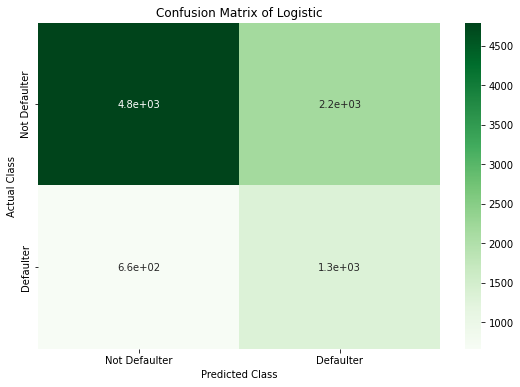

In [47]:
labels = ['Not Defaulter','Defaulter']

# plotting confusion matrix through heatmap
plt.figure(figsize = (9,6))
sns.heatmap(logistic_test_confusion_matrix,cmap = 'Greens', annot = True, xticklabels = labels, yticklabels = labels)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.title('Confusion Matrix of Logistic',fontsize = 12)

# Decision Tree Classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier


dtc_parameters = {'max_depth':[2,4,6,8,10],
              'min_samples_leaf':[2,4,6,8,10], 
              'min_samples_split':[2,4,6,8,10],
              }

dtc_model = GridSearchCV(DecisionTreeClassifier(), param_grid= dtc_parameters, scoring = 'recall', cv=3, n_jobs=-1)
dtc_model.fit(X_train_rs, y_train_rs)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6, 8, 10]},
             scoring='recall')

In [49]:
dtc_model.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=4)

In [50]:
dtc_model.best_params_

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 4}

In [51]:
dtc_model.score(X_train_rs, y_train_rs)

0.7386678147487545

In [52]:
dtc_model.best_score_

0.7057641363459215

In [53]:
# Get the y- train & test predicted values
y_train_preds_dtc = dtc_model.predict(X_train_rs)
y_test_preds_dtc = dtc_model.predict(X_test)

Getting Accuracy

In [54]:
dtc_train_accuracy= accuracy_score(y_train_rs, y_train_preds_dtc)
dtc_test_accuracy= accuracy_score(y_test, y_test_preds_dtc)

print("The accuracy-train data", dtc_train_accuracy)
print("The accuracy-test data", dtc_test_accuracy)

The accuracy-train data 0.7661910326588351
The accuracy-test data 0.7224581005586592


In [55]:
dtc_test_precision= precision_score(y_test, y_test_preds_dtc)
dtc_test_recall= recall_score(y_test, y_test_preds_dtc)
dtc_test_f1score= f1_score(y_test, y_test_preds_dtc)
dtc_test_roc_auc= roc_auc_score(y_test, y_test_preds_dtc)
dtc_test_confusion_matrix= confusion_matrix(y_test, y_test_preds_dtc)

In [56]:
model = pd.DataFrame([['Decision Tree Classifier', dtc_test_accuracy, dtc_test_precision, dtc_test_recall, 
                         dtc_test_f1score, dtc_test_roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC Score'])
model_results= model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC Score
0,Logistic-Regression,0.684358,0.381007,0.668339,0.485334,0.678643
1,Decision Tree Classifier,0.722458,0.415199,0.603111,0.491817,0.679879


Text(0.5, 1.0, 'Confusion Matrix')

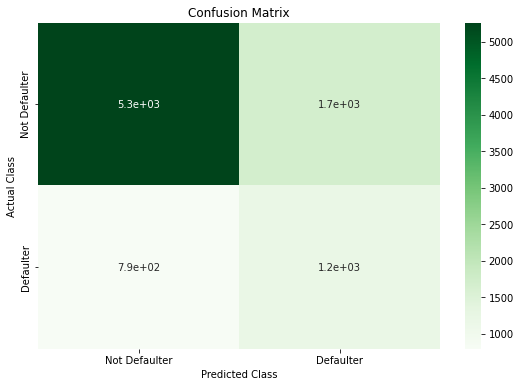

In [57]:
labels = ['Not Defaulter','Defaulter']
# heatmap
plt.figure(figsize = (9,6))
sns.heatmap(dtc_test_confusion_matrix,cmap = 'Greens', annot = True, xticklabels = labels, yticklabels = labels)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.title('Confusion Matrix',fontsize = 12)

## **Support Vector Machine(SVM) Implementation**

Support Vector Machine Algorithm Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.

In [ ]:
from sklearn import svm
 
#Create a svm Classifier
svm_model = svm.SVC(kernel = 'poly', gamma='scale', probability=True) 
 
#Train the model using the training sets
svm_model.fit(X_train_rs, y_train_rs)